# Linear Regression

Parts of project for linear regression:
## Input, output parameters [x_train, y_train]
#### x_train and y_train as numpy vectors of m-values
We will create some (4) dots as data for our model

## Model of linear regression
#### straight line function: f(x) = y = w.x + b
Where:
    x and y are our datas of model<br>
    w and b are parameters of model

## Cost function
#### Mean squared error as cost function
Cost function:  J(w, b) = 1/2m.sum(f(x)-y)^2<br>
                J(w, b) = 1/2m.sum((w.x + b)-y)^2
                
## Gradient Descent algorithm
#### Algorithm to minimize cost function
Is based on finding derivation of cost function based on model parameters w and b:<br>
w = w - alpha.dJ_dw(J(w, b))<br>
b = b - alpha.dJ_db((J(w, b))

w = w - alpha.dJ_dw(1/2m.sum((w.x + b)-y)^2)<br>
b = b - alpha.dJ_db(1/2m.sum((w.x + b)-y)^2)

dJ_dw(J(w, b)) = 1/m.sum(((w.x + b)-y).x)<br>
dJ_db(J(w, b)) = 1/m.sum((w.x + b)-y)

..so final gradient descent for w and b looks:

w = w - alpha.1/m.sum(((w.x + b)-y).x)<br>
b = b - alpha.1/m.sum((w.x + b)-y)

## Training
#### Searching best parameters of w and b to find straight line which is closest to all poinst
Means that we run gradient descent algorithm in loop (e.g. 1000 times) with alpha set as some small number (e.g. 0.001)<br>
When we run the gradient descent algorithm in many steps, the parameters w and b are changing its value to do the best - looks for local minima of cost function J(w, b)
## Visualization
using matplotlib to visualize our input data, straight line function, cost function of training process and animation how was our straight line changed during training

In [2]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import display
import copy

Create our input parameters x_train and y_train as numpy vectors

In [3]:
x_train = np.array([56, 48, 66, 72])
y_train = np.array([130000, 118000, 145000, 180000])

Get number of dots of our data from x_train parameter using numpy function .shape[]

In [4]:
m = x_train.shape[0]
print(f'Count of data points: {m}')

Count of data points: 4


Draw whole data poinst using matplotlib and scatter plot:

Text(0, 0.5, 'Price')

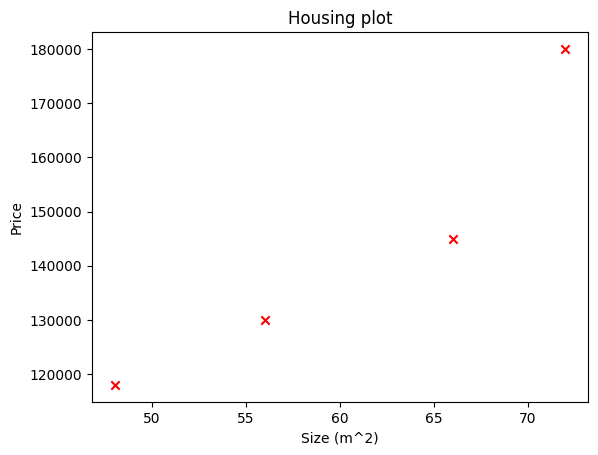

In [5]:
plt.scatter(x_train, y_train, marker='x', color='r')
plt.title('Housing plot')
plt.xlabel('Size (m^2)')
plt.ylabel('Price')

# Straight line function:

In [6]:
# in this step we will gues the paramter of model (e.g. 800 and 100000)

w = 800
b = 100000

# create an empty numpy array with the same length as input data
f_wb = np.zeros(m)

# calculate and fill our straight line model with our input data poinst

for i in range(m):
    f_wb[i] = w * x_train[i] + b

print(f_wb)

[144800. 138400. 152800. 157600.]


Lets draw our straight line and datapoints together in one chart

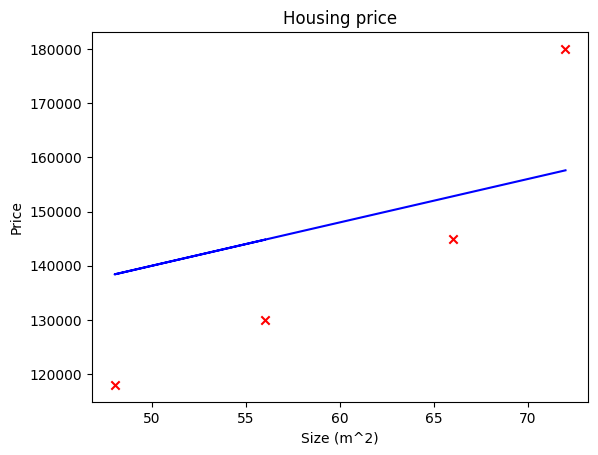

In [7]:
plt.scatter(x_train, y_train, marker='x', color='r')
plt.title('Housing price')
plt.xlabel('Size (m^2)')
plt.ylabel('Price')

plt.plot(x_train, f_wb, label='Our Prediction', color='b')

# Cost function

In [8]:
def compute_cost(x, y, w, b): 
    """
    Calculates cost function for given model parameters w and b
    
    Arguments:
      x (ndarray (m,)): Input data, m - size of vector 
      y (ndarray (m,)): Target data poinst, m - size of vector
      w,b (scalar)    : Model Parameters w and b  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

We can now compute the cost of our guessed model, to see how wrong we are:

In [9]:
# x_train and y_train are our input data points
# w and b are our buessed parameters

cost = compute_cost(x_train, y_train, w, b)
print(cost)

149725000.0


# Gradiend Descent

This function compute_gradient_descent is to calculate 1/m(sum(derivation of J(w, b))) 


In [10]:
def compute_gradient_descent(x, y, w, b):
    """
    Calculates derivation for each x,y parameter of given model parameters w and b
    Sums calculated derivations
    Devides result with 'm' as count of input parameters
    
    Arguments:
      x (ndarray (m,)): Input data, m - size of vector 
      y (ndarray (m,)): Target data poinst, m - size of vector
      w,b (scalar)    : Model Parameters w and b  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    
    m = x.shape[0]
    dJ_dw = 0
    dJ_db = 0
    
    for i in range(m):
        f_x = w * x[i] + b
        dJ_dw_i = (f_x - y[i]) * x[i]
        dJ_db_i  = (f_x - y[i])
        dJ_dw += dJ_dw_i
        dJ_db += dJ_db_i
    dJ_dw = dJ_dw / m
    dJ_db = dJ_dw / m
    
    return dJ_dw, dJ_db        

# Training
## Searching for best model parameters - running gradient descent and re-set <i><u>w</u></i> and <i><u>b</u></i> for better results

The best model parameters: w: 2168.50, b: 10342.13


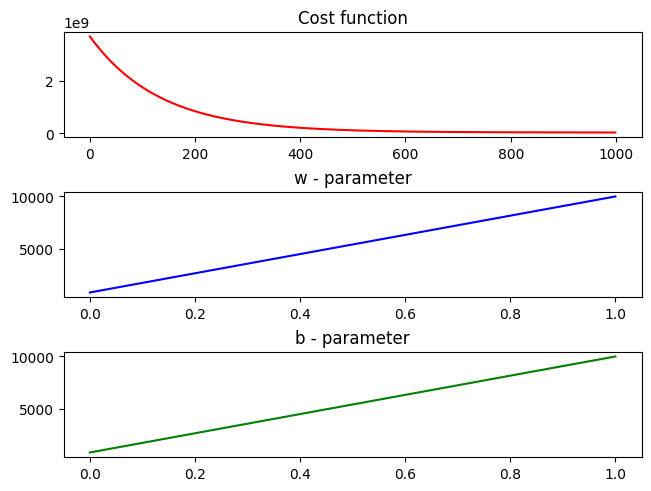

In [11]:
# initialize model of some numbers
w_init = 800
b_init = 10000

# define count of itterations and alpha parameters
iterations = 1000
alpha = 1.0e-6

# avoid modifying global array 
w = copy.deepcopy(w_init)
b = copy.copy(b_init)

# arrays to store cost values and model parameters (w and b) in all steps of training - to future plotting function
cost_history = []
model_parameters_history = []

# run trainig
for i in range(iterations):
    # calculate:
    #     dJ_dw(J(w, b)) = 1/m.sum(((w.x + b)-y).x)
    #     dJ_db(J(w, b)) = 1/m.sum((w.x + b)-y)
    # of:
    #     w = w - alpha.dJ_dw(J(w, b))
    #     b = b - alpha.dJ_db((J(w, b))
    
    dj_dw, dj_db = compute_gradient_descent(x_train, y_train, w, b )
    
    # calculate:
    #     w = w - alpha.dJ_dw(J(w, b))
    #     b = b - alpha.dJ_db((J(w, b))
    
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    
    # save all costs and model pamameter in to array
    cost_history.append(compute_cost(x_train, y_train, w, b))
    model_parameters_history.append([w, b])
    
# plot progress of cost function and parameters w and b during each itterations (x-axes)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True)
ax1.plot(cost_history, color='red')
ax1.set_title('Cost function')
ax2.plot(model_parameters_history[0], color='blue') 
ax2.set_title('w - parameter')
ax3.plot(model_parameters_history[1], color='green')
ax3.set_title('b - parameter')
print("The best model parameters: w: {:.2f}, b: {:.2f}".format(model_parameters_history[-1][0], model_parameters_history[-1][1]))

# PLOT the result (best=last model parameters) with input data points
.. to see how the result line (as results of training) fits with datapoints

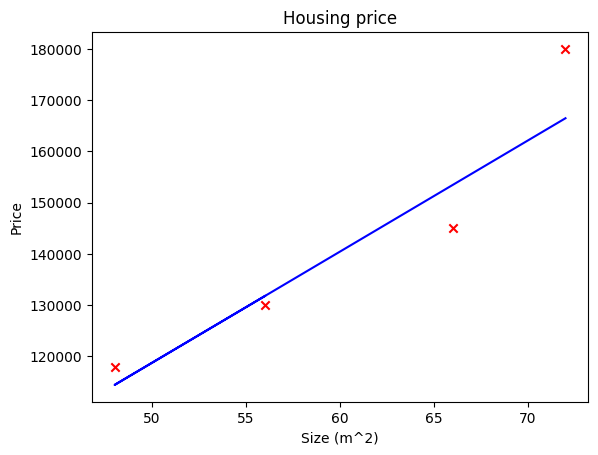

In [12]:
# get best = last results of model from training process
best_model = model_parameters_history[-1]
best_w = best_model[0]
best_b = best_model[1]

m = x_train.shape[0]

f_wb = np.zeros(m)

for i in range(m):
    f_wb[i] = best_w * x_train[i] + best_b

plt.scatter(x_train, y_train, marker='x', color='r')
plt.title('Housing price')
plt.xlabel('Size (m^2)')
plt.ylabel('Price')

plt.plot(x_train, f_wb, label='Our Prediction', color='b')

# Plot animated chart of how progess of training model
This plot is interactive and shows how the straight line changed itself during training from step 0 to final step :)

Generating of animation takes some time. Be patient..


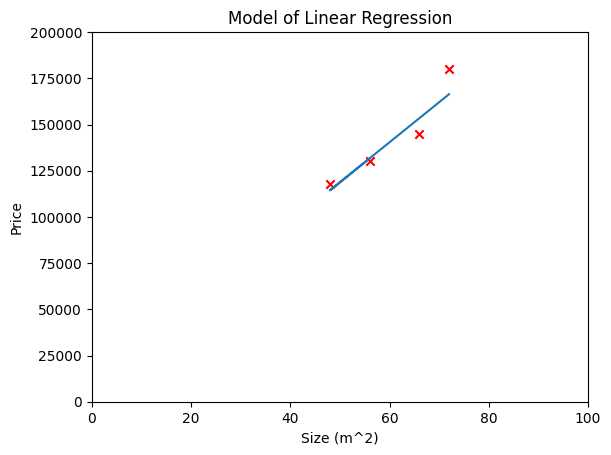

In [13]:
m = x_train.shape[0]

# for faster generation of result, we will get only each 10-tg step from all 1000 iterations
partial_model_paramters = model_parameters_history[::10]

model_progess = []

# calculate function of straight line for each model in partial_model_parameters
for w, b in partial_model_paramters:
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x_train[i] + b
    model_progess.append(f_wb)

fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2)

ax.set_xlim(np.min(x_train), np.max(x_train))
ax.set_ylim(np.min(y_train), np.max(y_train))

ax.set_xlim(0, 100)
ax.set_ylim(0, 200000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    ax.clear()
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 200000)
    plt.scatter(x_train, y_train, marker='x', color='r')
    plt.title('Model of Linear Regression')
    plt.xlabel('Size (m^2)')
    plt.ylabel('Price')
    line, = ax.plot(x_train, model_progess[i])
    return line,

print('Generating of animation takes some time. Be patient..')
ani = animation.FuncAnimation(
    fig, animate, frames=len(model_progess), init_func=init, blit=True)

ani.save('images/changing_line.gif', writer='pillow', fps=30)

display(HTML(ani.to_jshtml()))


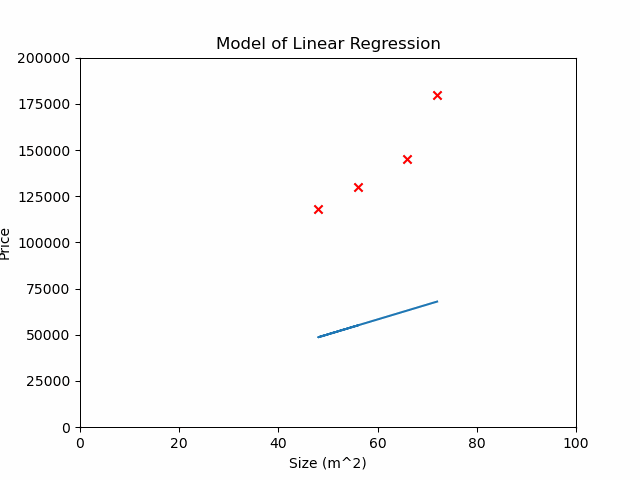

In [2]:
#If you are display this notebook in github, you probably don't see the beautifull animation so here is function to gisplay GIF:

from displays import show_gif
show_gif('images/changing_line.gif')